In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set rcParams
import matplotlib.pylab as pylab
params = {'axes.titlesize':'x-large'}
pylab.rcParams.update(params)

# Load lineup data
lineups = pd.DataFrame.from_csv('2017Lineups.csv')

# Load position data
clusters = pd.DataFrame.from_csv('PositionClusters.csv')
clusters['PLAYER_ID'] = clusters['PLAYER_ID'].astype(int)

# Get players last available season-position
clusters = clusters.sort_values(by='Season', ascending=False).reset_index(drop=True)
clusters = clusters.groupby('PLAYER_ID').first().reset_index()

In [2]:
# Estimate number of possessions using pace and minutes
lineups['Poss'] = lineups['PACE']*lineups['MIN']/48

# View results
lineups.sort_values('Poss')

,GROUP_SET,TITLE_DESCRIPTION,DESCRIPTION,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,PACE,PIE,Identity,Opponent,Season_Type,Poss
29814,ON,"Bucks stats while G. Antetokounmpo , J. Henson...","D. Russell, N. Young, J. Randle, J. Clarkson, ...",1.0,0.0,0.0,0.0,0.000,0.00,0.0,...,0.000,0.000,0.000,0.000,-4.90,0.333,"[203507, 203089, 203503, 203521, 1627763]","[1626156, 201156, 203944, 203903, 1627826]",Regular Season,-0.102083
34167,ON,"Warriors stats while K. Durant , K. Thompson ,...","L. James, J. Smith, K. Irving, R. Jefferson, K...",1.0,0.0,0.0,0.0,0.000,0.00,0.0,...,0.000,0.000,0.000,0.000,-4.02,0.444,"[201142, 202691, 201939, 2738, 201580]","[2544, 2747, 202681, 2210, 201567]",Playoffs,-0.083750
4758,ON,"Suns stats while D. Booker , A. Williams , L. ...","J. Jerebko, T. Rozier, T. Zeller, J. Crowder, ...",0.0,181.8,217.4,-35.6,0.000,0.00,0.0,...,0.000,0.000,0.000,0.909,302.64,0.143,"[1626164, 1626210, 2571, 201162, 1627755]","[201973, 1626179, 203092, 203109, 202738]",Regular Season,0.000000
22483,ON,"76ers stats while R. Covington , E. Ilyasova ,...","M. Brogdon, G. Monroe, M. Teletovic, J. Terry,...",0.0,0.0,113.6,-113.6,0.000,0.00,0.0,...,0.000,0.000,0.000,0.000,126.72,0.667,"[203496, 101141, 203457, 203917, 204456]","[1627763, 202328, 203141, 1891, 203953]",Regular Season,0.000000
4670,ON,"Suns stats while T. Warren , M. Chriss , T. Ch...","M. Gasol, M. Conley, B. Wright, J. Ennis III, ...",0.0,106.4,0.0,106.4,0.000,0.00,0.0,...,0.000,0.000,0.000,0.532,148.11,4.000,"[203933, 1627737, 2199, 1626164, 202339]","[201188, 201144, 201148, 203516, 203584]",Regular Season,0.000000
4669,ON,"Suns stats while T. Warren , M. Chriss , T. Ch...","C. Parsons, M. Gasol, T. Allen, M. Conley, B. ...",0.0,0.0,0.0,0.0,0.000,0.00,0.0,...,0.000,0.000,0.000,0.000,84.71,1.000,"[203933, 1627737, 2199, 1626164, 202339]","[202718, 201188, 2754, 201144, 201148]",Regular Season,0.000000
22484,ON,"76ers stats while R. Covington , E. Ilyasova ,...","M. Brogdon, G. Monroe, M. Teletovic, J. Parker...",0.0,0.0,200.0,-200.0,0.000,0.00,0.0,...,0.500,0.000,0.000,0.000,144.00,0.000,"[203496, 101141, 203457, 204456, 201945]","[1627763, 202328, 203141, 203953, 203521]",Regular Season,0.000000
7969,ON,"Grizzlies stats while A. Harrison , J. Martin ...","T. Jones, S. Muhammad, Z. LaVine, K. Towns, G....",0.0,0.0,200.0,-200.0,0.000,0.00,0.0,...,0.000,0.000,0.000,0.000,151.58,-0.500,"[1626150, 1626185, 1627735, 203210, 2216]","[1626145, 203498, 203897, 1626157, 203476]",Regular Season,0.000000
4665,ON,"Suns stats while P. Tucker , B. Knight , L. Ba...","B. Wright, J. Ennis III, T. Daniels, T. Dougla...",0.0,0.0,0.0,0.0,0.000,0.00,0.0,...,1.000,0.000,0.000,0.000,240.00,0.000,"[200782, 202688, 2571, 203458, 201162]","[201148, 203516, 203584, 201962, 202718]",Regular Season,0.000000
4664,ON,"Suns stats while P. Tucker , B. Knight , D. Bo...","T. Daniels, J. Green, T. Douglas, A. Harrison,...",0.0,227.3,0.0,227.3,0.000,0.00,0.0,...,0.000,0.000,0.000,1.136,211.20,2.000,"[200782, 202688, 1626164, 202339, 2199]","[203584, 203210, 201962, 1626150, 201148]",Regular Season,0.000000


In [3]:
# Create offensive position dictionary
o_dict = clusters.set_index(['PLAYER_ID'])['Offensive Position'].to_dict()

# Extract player IDs from lineups
lineups_identity = [[int(s) for s in re.findall(r'\b\d+\b', lineups['Identity'][i])] for i in range(len(lineups))]
lineups_opponent = [[int(s) for s in re.findall(r'\b\d+\b', lineups['Opponent'][i])] for i in range(len(lineups))]
lineups_identity = [[subelt for subelt in elt if subelt != 0] for elt in lineups_identity]
lineups_opponent = [[subelt for subelt in elt if subelt != 0] for elt in lineups_opponent]

# Map position to player ID
mapped_identity = [[o_dict[k] for k in lineups_identity[i]] for i in range(len(lineups_identity))]
mapped_opponent = [[o_dict[k] for k in lineups_opponent[i]] for i in range(len(lineups_opponent))]

# Count positions in a lineup
o_position_list_counter_identity = []
o_position_list_counter_opponent = []
for i in range(len(mapped_identity)):
    o_position_list_counter_identity.append(Counter(mapped_identity[i]))
    o_position_list_counter_opponent.append(Counter(mapped_opponent[i]))

# Determine identity lineup type
basic_type_identity = []
for i in o_position_list_counter_identity:
    if i['Big'] >= 2:
        basic_type_identity.append('Traditional')
    else:
        basic_type_identity.append('Small-ball')
        
# Determine opponent lineup type        
basic_type_opponent = []
for i in o_position_list_counter_opponent:
    if i['Big'] >= 2:
        basic_type_opponent.append('Traditional')
    else:
        basic_type_opponent.append('Small-ball')

# Add to DataFrame        
lineups['Basic_Type_Identity'] = basic_type_identity
lineups['Basic_Type_Opponent'] = basic_type_opponent

# Count length of each lineup
identity_len = []
opponent_len = []
for i in range(len(lineups_identity)):
    identity_len.append(len(lineups_identity[i]))
    opponent_len.append(len(lineups_opponent[i]))

lineups['Identity_Len'] = identity_len
lineups['Opponent_Len'] = opponent_len

# Only pass matchups with 5 players each
print('Matchups prior to 5-player check:', len(lineups))
lineups = lineups.loc[(lineups['Identity_Len'] == 5) & (lineups['Opponent_Len'] == 5)]
print('Matchups after 5-player check:', len(lineups))

# Make sure there was at least a possesion in each direction
lineups = lineups.loc[lineups['Poss'] >= 1.5]
print('Matchups after >= 1.5 possessions check:', len(lineups))

Matchups prior to 5-player check: 34632
Matchups after 5-player check: 34188
Matchups after >= 1.5 possessions check: 26059


In [4]:
# Create dataframes for the two ways small-ball lineups can be matched up with traditional ones
df = lineups.loc[(lineups['Basic_Type_Identity'] == 'Small-ball') & (lineups['Basic_Type_Opponent'] == 'Traditional')]
df2 = lineups.loc[(lineups['Basic_Type_Identity'] == 'Traditional') & (lineups['Basic_Type_Opponent'] == 'Small-ball')]

# We are going to be testing the efficacy of small-ball, so the traditional lineups net_rating will be reversed
df2['NET_RATING'] = -df2['NET_RATING']

# In the same spirit, the offense of a small-ball unit is the defense of a traditional unit
df2.rename(columns={'OFF_RATING':'DEF_RATING', 'DEF_RATING':'OFF_RATING'}, inplace=True)

# Combine and separate into playoffs and regular season
small_vs_trad = pd.concat([df, df2])
playoffs = small_vs_trad.loc[small_vs_trad['Season_Type'] == 'Playoffs']
regular = small_vs_trad.loc[small_vs_trad['Season_Type'] == 'Regular Season']

/Users/matthewignal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/matthewignal/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [6]:
def wavg(group, avg_name, weight_name):
    """
    Computes Weighted Average
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()
    
# Apply function to compute net rating
n_small_vs_trad = small_vs_trad.groupby('Season_Type').apply(wavg, "NET_RATING", "Poss")
combined = small_vs_trad.groupby('GROUP_SET').apply(wavg, "NET_RATING", "Poss")

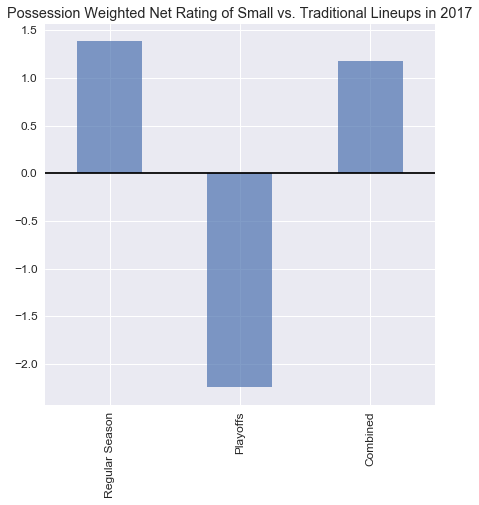

In [29]:
# Compare through a plot
compare = pd.DataFrame(pd.concat([n_small_vs_trad, combined]))
compare = compare.rename(index={'ON': 'Combined'})
compare = compare.reindex(index = ['Regular Season','Playoffs','Combined'])
compare.plot(kind='bar', title='Possession Weighted Net Rating of Small vs. Traditional Lineups in 2017', alpha=0.7, legend=False,
             figsize=(7, 7), fontsize=12)
plt.axhline(0, color='k')

In [28]:
# Print some stats
print("Net Ratings", n_small_vs_trad)
print()
print("Combined:", combined.values)
print()
print("Playoff Minutes:", playoffs['MIN'].sum())
print("Regular Season Minutes:", regular['MIN'].sum())
print()
offense = small_vs_trad.groupby('Season_Type').apply(wavg, "OFF_RATING", "Poss")
print("Offense:", offense)
defense = small_vs_trad.groupby('Season_Type').apply(wavg, "DEF_RATING", "Poss")
print("Defense:", defense)
# Look at playoffs in more detail
playoffs.sort_values('MIN', ascending=False)[['TITLE_DESCRIPTION', 'DESCRIPTION', 'Basic_Type_Identity', 'MIN',
                                              'OFF_RATING', 'DEF_RATING', 'NET_RATING']]

Net Ratings Season_Type
Playoffs         -2.244926
Regular Season    1.383709
dtype: float64

Combined: [ 1.17367059]

Playoff Minutes: 1414.0
Regular Season Minutes: 22868.0

Offense: Season_Type
Playoffs          105.502319
Regular Season    106.296531
dtype: float64
Defense: Season_Type
Playoffs          107.744041
Regular Season    104.913541
dtype: float64


,TITLE_DESCRIPTION,DESCRIPTION,Basic_Type_Identity,MIN,OFF_RATING,DEF_RATING,NET_RATING
33012,"Thunder stats while V. Oladipo , R. Westbrook ...","R. Anderson, J. Harden, T. Ariza, C. Capela, P...",Traditional,53.0,80.1,108.1,-28.0
33926,"Raptors stats while D. Carroll , S. Ibaka , J....","K. Middleton, G. Antetokounmpo, T. Maker, T. S...",Traditional,26.0,126.1,100.4,25.7
33193,"Clippers stats while L. Mbah a Moute , B. Grif...","G. Hayward, B. Diaw, D. Favors, J. Ingles, G. ...",Traditional,25.0,83.5,94.8,-11.2
32681,"Celtics stats while M. Smart , A. Bradley , A....","M. Morris, B. Beal, J. Wall, M. Gortat, O. Por...",Small-ball,19.0,74.0,116.7,-42.7
33598,"Rockets stats while E. Gordon , T. Ariza , C. ...","K. Leonard, L. Aldridge, P. Gasol, D. Green, P...",Small-ball,15.0,140.6,114.6,25.9
32690,"Celtics stats while G. Green , J. Crowder , A....","O. Porter Jr., M. Morris, M. Gortat, B. Beal, ...",Small-ball,15.0,76.2,153.1,-76.9
33645,"Bulls stats while J. Butler , N. Mirotic , R. ...","J. Crowder, A. Johnson, A. Horford, A. Bradley...",Small-ball,15.0,99.8,110.8,-11.0
34523,"Spurs stats while K. Leonard , L. Aldridge , P...","T. Ariza, R. Anderson, C. Capela, P. Beverley,...",Traditional,15.0,91.6,107.7,-16.1
34223,"Warriors stats while K. Durant , D. Green , Z....","G. Hayward, B. Diaw, R. Gobert, J. Ingles, S. ...",Traditional,13.0,61.8,100.9,-39.1
33872,"Jazz stats while G. Hayward , J. Johnson , R. ...","K. Durant, D. Green, Z. Pachulia, K. Thompson,...",Small-ball,12.0,85.8,118.4,-32.7
